<a href="https://colab.research.google.com/github/1dgog/tc3006c_m2_portafoliodeimplementacion/blob/main/m2_con_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.

## Importación de librerías y dataset

In [3]:
%%capture
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive"
!ls

### Librerias

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # para hacer visualizacion
from sklearn.neural_network import MLPClassifier # para clasificacion
from sklearn.model_selection import train_test_split # para separacion de datos
from sklearn import metrics
from sklearn.metrics import confusion_matrix # para matrices de confusion
from sklearn.model_selection import cross_val_predict
from google.colab import files # para descargar figuras

### Nombramiento de dataset y visualización inicial

In [5]:
columns = ["alcohol","malic_acid","ash","alcalinity_of_ash", "magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280","proline"] # definir nombres de columna manualmente
df = pd.read_csv('wine.data',names = columns) # abrir el archivo de datos con los nombres dados para las columnas
df = df.reset_index() # se añade un nuevo indice para que el indice previo sea una clasificación que se usara en la siguiente figura.

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  od280                 178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
   index  alcohol  mal

Se nombran los datasets de entrada y salida con el que será entrenado el modelo. Se están tomando todas las características.

In [7]:
dfInput = df[["alcohol","malic_acid","ash","alcalinity_of_ash", "magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280","proline"]]
dfOutput = df[["index"]]

## Aplicación de redes neuronales, puntajes y matrices de confusion

### Separación de datos de entrenamiento, validacion y datos de prueba

In [8]:
X_train, X_r, y_train, y_r = train_test_split(dfInput, dfOutput, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_r, y_r, random_state=0)

### Obtención de puntajes y matrices de confusión

Esté código es una simplificación de lo que se hace más adelante, que sirve para entender como funcionan los ciclos.

In [9]:
alm_1 = []
cont = 0
for ii in range (5, 45, 5):
  if cont == 1:
    alm_1.append(alm_jj)
  alm_jj = []
  cont  = 1
  for jj in range (5,40, 5):
    alm_jj.append(jj)
print(alm_jj)
print(np.asarray(alm_1).shape)

[5, 10, 15, 20, 25, 30, 35]
(7, 7)


Se hizo un ciclo for en el que se inicia con 5 capas ocultas y va hasta cuarenta con pasos de 5. (para cambiar el número de neuronas capas ocultas)

Dentro de este se hizo otro ciclo for en el que se inicia con 5 capas ocultas y va hasta cuarenta con pasos de 5. (para cambiar el número de neuronas por capa)

Estos datos se almacenan en vectores, tanto para los datos de entrenamiento como para los de test.

In [10]:
%%capture

scores_train = []
scores_valid= []
scores_test = []
almacenamiento_conf_mat_train = []
almacenamiento_conf_mat_valid = []
almacenamiento_conf_mat_test = []

cont = 0

for ii in range (5, 45, 5): # el número de ii (ii,jj) es el que modifica el número de capas ocultas
  if cont == 1:
    scores_train.append(jj_scores_train)
    scores_valid.append(jj_scores_valid) # aqui estaba el error
    scores_test.append(jj_scores_test)
    almacenamiento_conf_mat_train.append(jj_mc_train)
    almacenamiento_conf_mat_valid.append(jj_mc_valid) # aqui estaba el error
    almacenamiento_conf_mat_test.append(jj_mc_test)

  cont = 1
  
  jj_scores_train = []
  jj_scores_valid = []
  jj_scores_test = []
  jj_mc_train = []
  jj_mc_valid = []
  jj_mc_test = []

  for jj in range(5,40,5):
    cross_val_predict,
    nnRE = MLPClassifier(hidden_layer_sizes=(ii,jj),  ## cambiar estos parámetros
                        activation='logistic', verbose=False, solver='adam',
                        learning_rate='adaptive', max_iter=2000)
    nnRE.fit(X_train,y_train)
    jj_scores_train.append(nnRE.score(X_train, y_train))
    jj_scores_valid.append(nnRE.score(X_valid, y_valid))
    jj_scores_test.append(nnRE.score(X_test, y_test))
    
    jj_mc_train.append(confusion_matrix(y_train,cross_val_predict(nnRE,X_train,y_train, cv = 10)))
    jj_mc_valid.append(confusion_matrix(y_valid,cross_val_predict(nnRE,X_valid,y_valid, cv = 10)))
    jj_mc_test.append(confusion_matrix(y_test,cross_val_predict(nnRE,X_test,y_test, cv = 5)))

Se hace presenta el cambio de los scores con respecto a los parametros ii y jj del loop, que corresponden al número de capas ocultas y su número de neuronas por capa respectivamente.

In [11]:
print("--------------PUNTAJES--------------")
print("--------------ENTRENAMIENTO--------------")
print(np.array(scores_train))
print("--------------VALIDACIÓN--------------")
print(np.array(scores_valid))
print("--------------PRUEBA--------------")
print(np.array(scores_test))

--------------PUNTAJES--------------
--------------ENTRENAMIENTO--------------
[[0.69172932 0.9924812  0.37593985 0.9924812  0.37593985 0.37593985
  0.37593985]
 [0.9924812  0.9924812  0.9924812  0.9924812  0.9924812  0.9924812
  0.37593985]
 [0.37593985 0.9924812  0.9924812  0.37593985 0.9924812  0.37593985
  0.37593985]
 [0.9924812  0.37593985 0.9924812  0.9924812  0.9924812  0.37593985
  0.9924812 ]
 [0.9924812  0.9924812  0.9924812  0.9924812  0.9924812  0.9924812
  0.9924812 ]
 [0.9924812  0.9924812  0.9924812  0.9924812  0.9924812  0.9924812
  0.9924812 ]
 [0.69172932 0.9924812  0.9924812  0.9924812  0.9924812  0.9924812
  0.9924812 ]]
--------------VALIDACIÓN--------------
[[0.81818182 0.93939394 0.42424242 0.90909091 0.42424242 0.42424242
  0.42424242]
 [0.90909091 0.93939394 0.90909091 0.90909091 0.90909091 0.90909091
  0.42424242]
 [0.42424242 0.90909091 0.93939394 0.42424242 0.90909091 0.42424242
  0.42424242]
 [0.90909091 0.42424242 0.90909091 0.90909091 0.90909091 0.424242

In [12]:
print(pd.DataFrame(np.array(scores_train), columns = np.arange(5, 40, step = 5)).to_latex(index=True))
print(pd.DataFrame(np.array(scores_valid), columns = np.arange(5, 40, step = 5)).to_latex(index=True))
print(pd.DataFrame(np.array(scores_test), columns = np.arange(5, 40, step = 5)).to_latex(index=True))

\begin{tabular}{lrrrrrrr}
\toprule
{} &        5  &        10 &        15 &        20 &        25 &        30 &        35 \\
\midrule
0 &  0.691729 &  0.992481 &  0.375940 &  0.992481 &  0.375940 &  0.375940 &  0.375940 \\
1 &  0.992481 &  0.992481 &  0.992481 &  0.992481 &  0.992481 &  0.992481 &  0.375940 \\
2 &  0.375940 &  0.992481 &  0.992481 &  0.375940 &  0.992481 &  0.375940 &  0.375940 \\
3 &  0.992481 &  0.375940 &  0.992481 &  0.992481 &  0.992481 &  0.375940 &  0.992481 \\
4 &  0.992481 &  0.992481 &  0.992481 &  0.992481 &  0.992481 &  0.992481 &  0.992481 \\
5 &  0.992481 &  0.992481 &  0.992481 &  0.992481 &  0.992481 &  0.992481 &  0.992481 \\
6 &  0.691729 &  0.992481 &  0.992481 &  0.992481 &  0.992481 &  0.992481 &  0.992481 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrr}
\toprule
{} &        5  &        10 &        15 &        20 &        25 &        30 &        35 \\
\midrule
0 &  0.818182 &  0.939394 &  0.424242 &  0.909091 &  0.424242 &  0.424242 &  0.424

In [ ]:
print(pd.DataFrame(np.array(scores_train), columns = np.arange(5, 40, step = 5)).to_markdown())
print(pd.DataFrame(np.array(scores_valid), columns = np.arange(5, 40, step = 5)).to_markdown())
print(pd.DataFrame(np.array(scores_test), columns = np.arange(5, 40, step = 5)).to_markdown())

Información de arreglos donde se almacenaron los puntajes

In [ ]:
print("--------------ENTRENAMIENTO--------------")
np.info(np.array(scores_train))
print("--------------VALIDACIÓN--------------")
np.info(np.array(scores_valid))
print("--------------PRUEBA--------------")
np.info(np.array(scores_test))

Matrices de confusión

In [ ]:
print("--------------ENTRENAMIENTO--------------")
print(np.array(almacenamiento_conf_mat_train))
print("--------------VALIDACIÓN--------------")
print(np.array(almacenamiento_conf_mat_valid))
print("--------------PRUEBA--------------")
print(np.array(almacenamiento_conf_mat_test))

## Predicciones para README.md

Se genera la tabla para las predicciones disponibles en el README.md

In [26]:
%%capture
df_pred = pd.DataFrame(cross_val_predict(nnRE, 
                                         X_test, 
                                         y_test, 
                                         cv = 5))
visualizacion_predicciones = pd.concat([y_test,
                                        df_pred,
                                        X_test],
                                       axis=1)

In [ ]:
print(visualizacion_predicciones)
print(visualizacion_predicciones.to_markdown())
print(visualizacion_predicciones.to_latex(index=False))  

## Visualización gráfica de resultados

### Visualización de puntajes variando número de capas ocultas y de neuronas por capa con heatmap

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

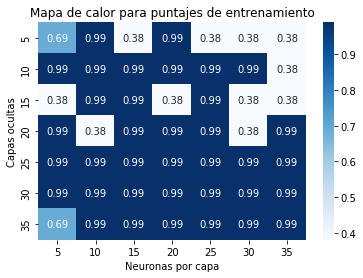

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

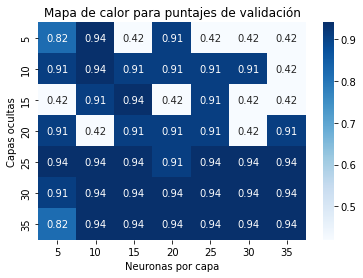

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

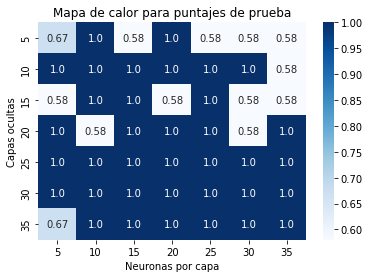

In [47]:
df_train = pd.DataFrame(np.around(np.array(scores_train),decimals=2), index = np.arange(5, 40, step = 5),
                  columns = np.arange(5, 40, step = 5))
s = sns.heatmap(df_train,annot=True, fmt="", cmap='Blues')
s.set(xlabel='Neuronas por capa', ylabel='Capas ocultas')
plt.title("Mapa de calor para puntajes de entrenamiento")
plt.savefig('hm_train.pdf') 
files.download("hm_train.pdf")
plt.show()

df_valid = pd.DataFrame(np.around(np.array(scores_valid),decimals=2), index = np.arange(5, 40, step = 5),
                  columns = np.arange(5, 40, step = 5))
s = sns.heatmap(df_valid,annot=True, fmt="", cmap='Blues')
s.set(xlabel='Neuronas por capa', ylabel='Capas ocultas')
plt.title("Mapa de calor para puntajes de validación")
plt.savefig('hm_valid.pdf') 
files.download("hm_valid.pdf")
plt.show()

df_test = pd.DataFrame(np.around(np.array(scores_test),decimals=2), index = np.arange(5, 40, step = 5),
                  columns = np.arange(5, 40, step = 5))
s = sns.heatmap(df_test,annot=True, fmt="", cmap='Blues')
s.set(xlabel='Neuronas por capa', ylabel='Capas ocultas')
plt.title("Mapa de calor para puntajes de prueba")
plt.savefig('hm_test.pdf') 
files.download("hm_test.pdf")
plt.show()

### Visualización de puntajes variando número de capas ocultas y de neuronas por capa en 3D

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

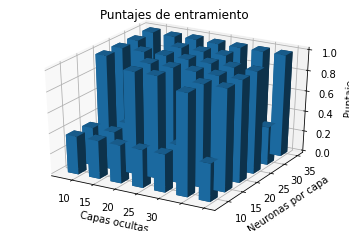

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

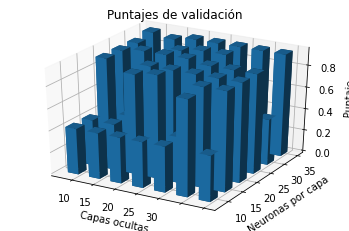

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

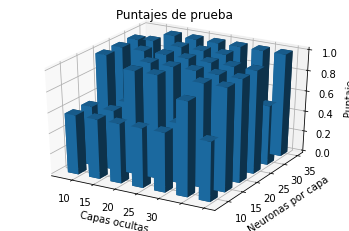

In [120]:
# entrenamiento

fig = plt.figure()
ax = plt.axes(projection = "3d")
capas = [5,10,15,20,25,30,35]
unidades = [5,10,15,20,25,30, 35]
data = np.array(scores_train)

numOfCols = 7
numOfRows = 7

xpos = np.arange(0, numOfCols, 1)
ypos = np.arange(0, numOfRows, 1)
xpos, ypos = np.meshgrid(xpos + 0.5, 
                         ypos + 0.5)
 
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(numOfCols * numOfRows)
 
dx = np.ones(numOfRows * numOfCols) * 0.5
dy = np.ones(numOfCols * numOfRows) * 0.5
dz = data.flatten()
 
ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
ax.set_xticklabels(capas)
ax.set_yticklabels(unidades)
 
ax.set_xlabel('Capas ocultas')
ax.set_ylabel('Neuronas por capa')
ax.set_zlabel('Puntaje')
ax.set_title("Puntajes de entramiento")
plt.savefig('scores_train3d.pdf') 
files.download("scores_train3d.pdf")
plt.show()

# validacion

fig = plt.figure()
ax = plt.axes(projection = "3d")
capas = [5,10,15,20,25,30,35]
unidades = [5,10,15,20,25,30, 35]
data = np.array(scores_valid)

numOfCols = 7
numOfRows = 7

xpos = np.arange(0, numOfCols, 1)
ypos = np.arange(0, numOfRows, 1)
xpos, ypos = np.meshgrid(xpos + 0.5, 
                         ypos + 0.5)
 
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(numOfCols * numOfRows)
 
dx = np.ones(numOfRows * numOfCols) * 0.5
dy = np.ones(numOfCols * numOfRows) * 0.5
dz = data.flatten()
 
ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
ax.set_xticklabels(capas)
ax.set_yticklabels(unidades)
 
ax.set_xlabel('Capas ocultas')
ax.set_ylabel('Neuronas por capa')
ax.set_zlabel('Puntaje')
ax.set_title("Puntajes de validación")
plt.savefig('scores_valid3d.pdf') 
files.download("scores_valid3d.pdf")
plt.show()

# prueba

fig = plt.figure()
ax = plt.axes(projection = "3d")
capas = [5,10,15,20,25,30,35]
unidades = [5,10,15,20,25,30, 35]
data = np.array(scores_test)

numOfCols = 7
numOfRows = 7

xpos = np.arange(0, numOfCols, 1)
ypos = np.arange(0, numOfRows, 1)
xpos, ypos = np.meshgrid(xpos + 0.5, 
                         ypos + 0.5)
 
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(numOfCols * numOfRows)
 
dx = np.ones(numOfRows * numOfCols) * 0.5
dy = np.ones(numOfCols * numOfRows) * 0.5
dz = data.flatten()
 
ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
ax.set_xticklabels(capas)
ax.set_yticklabels(unidades)
 
ax.set_xlabel('Capas ocultas')
ax.set_ylabel('Neuronas por capa')
ax.set_zlabel('Puntaje')
ax.set_title("Puntajes de prueba")
plt.savefig('scores_test3d.pdf') 
files.download("scores_test3d.pdf")
plt.show()

### Matrices de confusión para modelo simple y modelo refinado (presentados en README.md y sección de tecnica de regularización de reporte de análisis)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

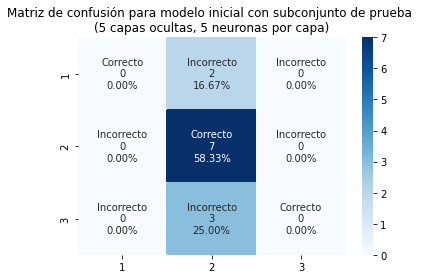

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

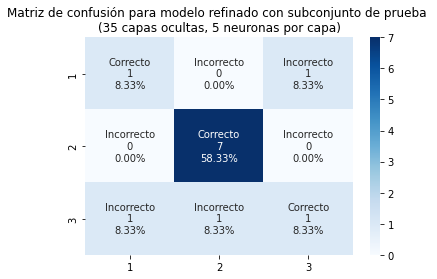

In [11]:
df_cf_test_ini = pd.DataFrame(np.asarray([[0, 2, 0], [0, 7, 0],[0, 3, 0]]), index = [1, 2, 3],
                  columns = [1, 2, 3])
group_names = ["Correcto","Incorrecto","Incorrecto","Incorrecto","Correcto","Incorrecto","Incorrecto","Incorrecto","Correcto"]
group_counts = ["{0:0.0f}".format(value) for value in
                np.array([[0, 2, 0], [0, 7, 0],[0, 3, 0]]).flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     np.array([[0, 2, 0], [0, 7, 0],[0, 3, 0]]).flatten()/np.sum(np.array([[0, 2, 0], [0, 7, 0],[0, 3, 0]]))]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)
sns.heatmap(df_cf_test_ini,annot=labels, fmt="", cmap='Blues')
plt.title("Matriz de confusión para modelo inicial con subconjunto de prueba \n(5 capas ocultas, 5 neuronas por capa)")
plt.savefig('cf_test_con_framework_ini.pdf') 
files.download("cf_test_con_framework_ini.pdf")
plt.show()

df_cf_test_ref = pd.DataFrame(np.asarray([[1, 0, 1], [0, 7, 0],[1, 1, 1]]), index = [1, 2, 3],
                  columns = [1, 2, 3])
group_names = ["Correcto","Incorrecto","Incorrecto","Incorrecto","Correcto","Incorrecto","Incorrecto","Incorrecto","Correcto"]
group_counts = ["{0:0.0f}".format(value) for value in
                np.array([[1, 0, 1], [0, 7, 0],[1, 1, 1]]).flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     np.array([[1, 0, 1], [0, 7, 0],[1, 1, 1]]).flatten()/np.sum(np.array([[1, 0, 1], [0, 7, 0],[1, 1, 1]]))]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)
sns.heatmap(df_cf_test_ref,annot=labels, fmt="", cmap='Blues')
plt.title("Matriz de confusión para modelo refinado con subconjunto de prueba \n(35 capas ocultas, 5 neuronas por capa)")
plt.savefig('cf_test_con_framework_ref.pdf') 
files.download("cf_test_con_framework_ref.pdf")
plt.show()

### Visualización de puntajes variando número de capas ocultas y de neuronas por capa en 2D

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

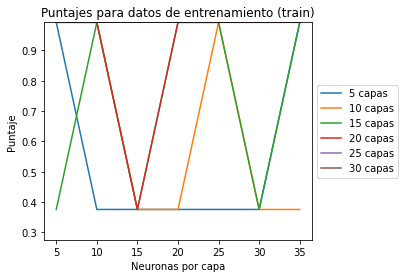

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

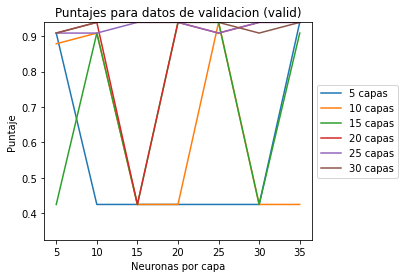

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

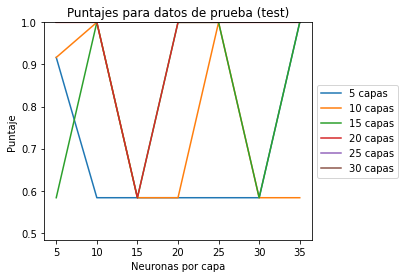

In [94]:
cont = 5
for a in range(0,len(np.array(scores_train)),1):
  plt.plot(np.array(scores_train)[a], label='%s capas' % cont)
  cont += 5
ax = plt.gca()
ax.set_ylim([np.min(scores_train)-0.1, np.max(scores_train)])
plt.legend()
plt.xticks(np.arange(0, 7, step = 1),np.arange(5, 40, step = 5))
plt.title('Puntajes para datos de entrenamiento (train)')
plt.ylabel("Puntaje")
plt.xlabel("Neuronas por capa")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('scores_train.pdf') 
files.download("scores_train.pdf")
plt.show()

cont = 5
for a in range(0,len(np.array(scores_valid)),1):
  plt.plot(np.array(scores_valid)[a], label='%s capas' % cont)
  cont += 5
ax = plt.gca()
ax.set_ylim([np.min(scores_valid)-0.1, np.max(scores_valid)])
plt.legend()
plt.xticks(np.arange(0, 7, step = 1),np.arange(5, 40, step = 5))
plt.title('Puntajes para datos de validacion (valid)')
plt.ylabel("Puntaje")
plt.xlabel("Neuronas por capa")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('scores_valid.pdf') 
files.download("scores_valid.pdf")
plt.show()

cont = 5
for a in range(0,len(np.array(scores_test)),1):
  plt.plot(np.array(scores_test)[a], label='%s capas' % cont)
  cont += 5
ax = plt.gca()
ax.set_ylim([np.min(scores_test)-.1, np.max(scores_test)])
plt.legend()
plt.xticks(np.arange(0, 7, step = 1),np.arange(5, 40, step = 5))
plt.title('Puntajes para datos de prueba (test)')
plt.ylabel("Puntaje")
plt.xlabel("Neuronas por capa")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('scores_test.pdf') 
files.download("scores_test.pdf")
plt.show()

### Visualización de cambio con respecto a matrices de confusión

#### Para resultados acertados
Suma de la diagonal de la matriz de confusión

In [40]:
sum_correcto_train = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_correcto_train.append(np.trace(np.array(almacenamiento_conf_mat_train)[ii,jj]))
    
sum_correcto_valid = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_correcto_valid.append(np.trace(np.array(almacenamiento_conf_mat_valid)[ii,jj]))

sum_correcto_test = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_correcto_test.append(np.trace(np.array(almacenamiento_conf_mat_test)[ii,jj]))

In [ ]:
print(np.array(sum_correcto_train).transpose())
print(np.array(sum_correcto_valid).transpose())
print(np.array(sum_correcto_test).transpose())

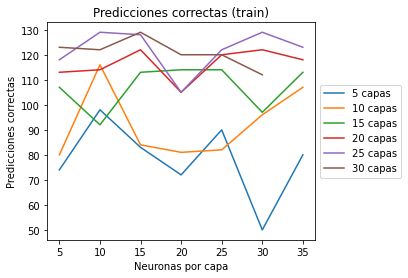

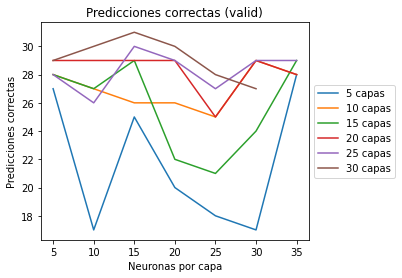

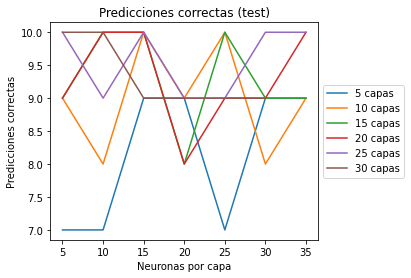

In [98]:
cont = 5
for a in range(0,len(np.array(sum_correcto_train)),6):
  plt.plot(np.array(sum_correcto_train)[a:a+7], label='%s capas' % cont)
  cont += 5
plt.legend()
ax = plt.gca()
plt.xticks(np.arange(0, 7, step = 1),np.arange(5, 40, step = 5))
plt.title('Predicciones correctas (train)')
plt.ylabel("Predicciones correctas")
plt.xlabel("Neuronas por capa")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('acertados_train.pdf')
#files.download("acertados_train.pdf")
plt.show()

cont = 5
for a in range(0,len(np.array(sum_correcto_valid)),6):
  plt.plot(np.array(sum_correcto_valid)[a:a+7], label='%s capas' % cont)
  cont += 5
plt.legend()
ax = plt.gca()
plt.xticks(np.arange(0, 7, step = 1),np.arange(5, 40, step = 5))
plt.title('Predicciones correctas (valid)')
plt.ylabel("Predicciones correctas")
plt.xlabel("Neuronas por capa")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('acertados_valid.pdf') 
#files.download("acertados_valid.pdf")
plt.show()


cont = 5
for a in range(0,len(np.array(sum_correcto_test)),6):
  plt.plot(np.array(sum_correcto_test)[a:a+7], label='%s capas' % cont)
  cont += 5
plt.legend()
ax = plt.gca()
plt.xticks(np.arange(0, 7, step = 1),np.arange(5, 40, step = 5))
plt.ylabel("Predicciones correctas")
plt.title('Predicciones correctas (test)')
plt.xlabel("Neuronas por capa")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('acertados_test.pdf')
#files.download("acertados_test.pdf")
plt.show()

#### Para resultados incorrectos
Se toma la resta de la suma total de los datos en la matriz, restada a los datos correctos (diagonal)

In [90]:
sum_incorrecto_train = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_incorrecto_train.append(np.sum(np.array(almacenamiento_conf_mat_train)[ii,jj])-np.trace(np.array(almacenamiento_conf_mat_train)[ii,jj]))

sum_incorrecto_valid = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_incorrecto_valid.append(np.sum(np.array(almacenamiento_conf_mat_valid)[ii,jj])-np.trace(np.array(almacenamiento_conf_mat_valid)[ii,jj]))

sum_incorrecto_test = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_incorrecto_test.append(np.sum(np.array(almacenamiento_conf_mat_test)[ii,jj])-np.trace(np.array(almacenamiento_conf_mat_test)[ii,jj]))

In [ ]:
print(np.array(sum_incorrecto_train).transpose())
print(np.array(sum_incorrecto_valid).transpose())
print(np.array(sum_incorrecto_test).transpose())

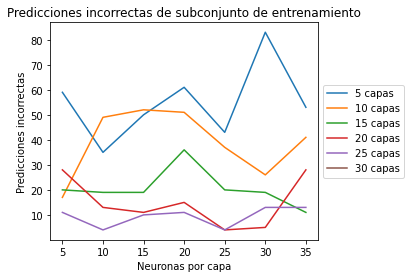

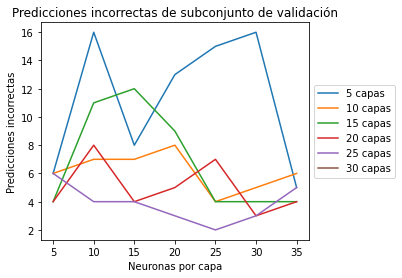

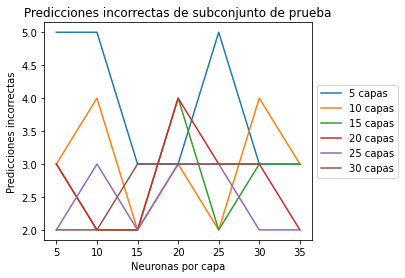

In [105]:
cont = 0
for a in range(0,len(np.array(sum_incorrecto_train)),7):
  cont += 5
  plt.plot(np.array(sum_incorrecto_train)[a:a+7], label='%s capas' % cont)
plt.legend()
ax = plt.gca()
plt.xticks(np.arange(0, 7, step = 1),np.arange(5, 40, step = 5))
plt.ylabel("Predicciones incorrectas")
plt.title('Predicciones incorrectas de subconjunto de entrenamiento')
plt.xlabel("Neuronas por capa")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('incorrectas_train.pdf')
#files.download("incorrectas_train.pdf")
plt.show()

cont = 0
for a in range(0,len(np.array(sum_incorrecto_valid)),7):
  cont += 5
  plt.plot(np.array(sum_incorrecto_valid)[a:a+7], label='%s capas' % cont)
plt.legend()
ax = plt.gca()
plt.xticks(np.arange(0, 7, step = 1),np.arange(5, 40, step = 5))
plt.ylabel("Predicciones incorrectas")
plt.title('Predicciones incorrectas de subconjunto de validación')
plt.xlabel("Neuronas por capa")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('incorrectas_valid.pdf')
#files.download("incorrectas_valid.pdf")
plt.show()

cont = 0
for a in range(0,len(np.array(sum_incorrecto_test)),6):
  cont += 5
  plt.plot(np.array(sum_incorrecto_test)[a:a+7], label='%s capas' % cont)
plt.legend()
ax = plt.gca()
plt.xticks(np.arange(0, 7, step = 1),np.arange(5, 40, step = 5))
plt.ylabel("Predicciones incorrectas")
plt.title('Predicciones incorrectas de subconjunto de prueba')
plt.xlabel("Neuronas por capa")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('incorrectas_test.pdf')
#files.download("incorrectas_test.pdf")
plt.show()

## Notas de asesorías

### Notas de asesoría 1.

Sesgo y varianza, estan relacionados, tiene que ver con el overfitting. Si tiene poco sesgo es porque tiene mucha varianza, y viceversa

Poner en terminos de bajo, medio y alto. 

No es necesario que sea de varios frameworks, con uno basta.}

Se pueden hacer gráficas de como cambia el score.+

### Notas de asesoría 2

Poner print de valores de entrada, y valores predecidos y esperados.